In [18]:
import pickle
import pandas as pd
from tqdm.auto import tqdm
from collections import Counter
import scipy

import warnings
warnings.filterwarnings('ignore')

In [19]:
df_sessions = pd.read_csv("data/session_df.csv")
df_sessions.head()

,Date,Action,Url,OperatingSystem,likes,v_ids,activity_time,ID,session,active_engament,video_length,wt_frac,passive_endorsement,class
0,2023-03-17 11:37:38,watching,https://www.tiktokv.com/share/video/6984429060...,NaN,NaN,6984429060914990342,26.0,6592,1,0,24.0,1.083333,0,0
1,2023-03-17 11:38:05,watching,https://www.tiktokv.com/share/video/7211168761...,NaN,NaN,7211168761695604014,20.0,6592,1,0,12.0,1.666667,0,0
2,2023-03-17 11:38:25,watching,https://www.tiktokv.com/share/video/7211204623...,NaN,NaN,7211204623296630022,6.0,6592,1,0,10.0,0.600000,0,0
3,2023-03-17 11:38:34,watching,https://www.tiktokv.com/share/video/7194066849...,NaN,NaN,7194066849594756354,37.0,6592,1,0,26.0,1.423077,0,1
4,2023-03-17 11:39:11,watching,https://www.tiktokv.com/share/video/7208232985...,NaN,NaN,7208232985055841542,9.0,6592,1,0,15.0,0.600000,0,0


In [20]:
len(df_sessions.v_ids.unique())

10618

In [21]:
Counter(df_sessions.Action)

Counter({'watching': 11475})

# Descriptives on Information & Endorsment

In [22]:
informative_videos = []
info_and_passive = []
non_info_and_passive = []
info_and_active = []
non_info_and_active = []

n_sessions = []
n_videos = []

for i in tqdm(list(df_sessions["ID"].unique())):
    print(i)
    session_df = df_sessions[df_sessions["ID"]==i]
    session_length = len(session_df)
    
    
    frac_info = Counter(session_df["class"])[1]/session_length 
    frac_info_passive = len(session_df[(session_df["class"]==1) & (session_df["passive_endorsement"]==1)])/len(session_df)
    frac_info_active = len(session_df[(session_df["class"]==1) & (session_df["active_engament"]>=1)])/len(session_df)
    frac_other_passive = len(session_df[(session_df["class"]==0) & (session_df["passive_endorsement"]==1)])/len(session_df)
    frac_other_active = len(session_df[(session_df["class"]==0) & (session_df["active_engament"]>=1)])/len(session_df)

    
    informative_videos.append(frac_info)
    info_and_passive.append(frac_info_passive)
    info_and_active.append(frac_info_active)
    non_info_and_passive.append(frac_other_passive)
    non_info_and_active.append(frac_other_active)
    n_sessions.append(len(session_df.session.unique()))
    n_videos.append(len(session_df))


  0%|          | 0/18 [00:00<?, ?it/s]

6592
4256
8802
8613
5319
1065
4855
7005
9228
8720
2354
6994
6871
3000
5209
6266
1435
6173


In [23]:
agg_df = pd.DataFrame({"info":informative_videos,
             "info_passive":info_and_passive,
             "other_passive":non_info_and_passive,
             "info_active":info_and_active,
             "other_active":non_info_and_active,
                      "n_sessions":n_sessions,
                      "n_videos":n_videos}).round(2)

In [24]:
agg_df.n_videos.sum()

11475

In [25]:
agg_df

,info,info_passive,other_passive,info_active,other_active,n_sessions,n_videos
0,0.03,0.01,0.18,0.00,0.02,100,1482
1,0.02,0.01,0.66,0.00,0.04,31,140
2,0.05,0.01,0.05,0.00,0.00,100,2002
3,0.05,0.03,0.67,0.00,0.09,57,286
4,0.07,0.03,0.43,0.01,0.07,97,674
5,0.04,0.02,0.62,0.00,0.01,94,642
6,0.06,0.05,0.75,0.00,0.01,16,93
7,0.00,0.00,0.90,0.00,0.00,2,10
8,0.08,0.02,0.70,0.00,0.01,23,120
9,0.03,0.02,0.71,0.01,0.40,83,373


In [26]:
agg_df.mean().round(2)

info               0.05
info_passive       0.02
other_passive      0.47
info_active        0.00
other_active       0.04
n_sessions        65.72
n_videos         637.50
dtype: float64

In [27]:
# Regrssion on agg

<Axes: xlabel='info', ylabel='info_passive'>

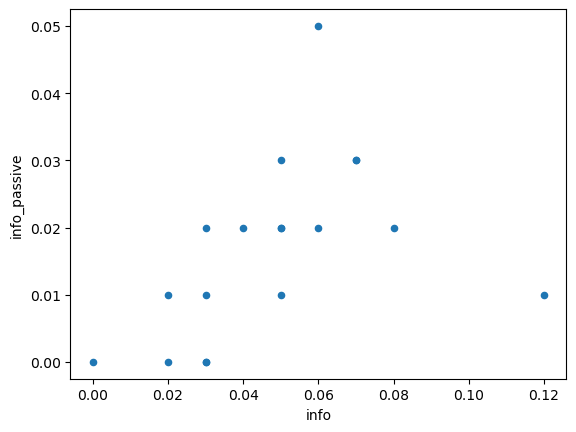

In [28]:
agg_df.plot(x="info",y="info_passive",kind="scatter")

# Analyse (per user per session) - aggegated on user us not possible for too few datapoints

In [29]:
df_sessions["ID"].unique()

array([6592, 4256, 8802, 8613, 5319, 1065, 4855, 7005, 9228, 8720, 2354,
       6994, 6871, 3000, 5209, 6266, 1435, 6173])

In [30]:
temp_df = df_sessions[df_sessions["ID"]==6592]

In [31]:

results = {}
for u_id in tqdm(df_sessions["ID"].unique()):
    informative_videos = []
    info_and_passive = []
    non_info_and_passive = []
    info_and_active = []
    non_info_and_active = []

    temp_df = df_sessions[df_sessions["ID"]==u_id]
    
    for i in tqdm(list(temp_df["session"].unique())):
        session_df = temp_df[temp_df["session"]==i]
        session_length = len(session_df)


        frac_info = Counter(session_df["class"])[0]/session_length 
        frac_info_passive = len(session_df[(session_df["class"]==0) & (session_df["passive_endorsement"]==1)])/len(session_df)
        frac_info_active = len(session_df[(session_df["class"]==0) & (session_df["active_engament"]>=1)])/len(session_df)
        frac_other_passive = len(session_df[(session_df["class"]==1) & (session_df["passive_endorsement"]==1)])/len(session_df)
        frac_other_active = len(session_df[(session_df["class"]==1) & (session_df["active_engament"]>=1)])/len(session_df)


        informative_videos.append(frac_info)
        info_and_passive.append(frac_info_passive)
        info_and_active.append(frac_info_active)
        non_info_and_passive.append(frac_other_passive)
        non_info_and_active.append(frac_other_active)

    agg_df = pd.DataFrame({"info":informative_videos,
             "info_passive":info_and_passive,
             "other_passive":non_info_and_passive,
             "info_active":info_and_active,
             "other_active":non_info_and_active}).round(2)
    #agg_df.plot(x="info_passive",y="info",kind="scatter")

    
    # passive
    x = agg_df["info_passive"]
    if sum(x) != 0:
        y = agg_df["info"]

        x = x[:-1]
        y = y[1:]

        result = scipy.stats.linregress(x, y)

        p = result.pvalue
        r = result.rvalue

        results[(u_id,"passive")] = (p,r)

    else:
        results[(u_id,"passive")] = (None,None)

    # active
    x = agg_df["info_active"]
    if sum(x) != 0:
        y = agg_df["info"]
        
        x = x[:-1]
        y = y[1:]
        result = scipy.stats.linregress(x, y)

        p = result.pvalue
        r = result.rvalue
        results[(u_id,"active")] = (p,r)
        
        try:
            # comined
            x = np.array(agg_df[["info_passive","info_active"]])
            y = agg_df["info"]
            x = x[:-1]
            y = y[1:]
            result = scipy.stats.linregress(x, y)

            p = result.pvalue
            r = result.rvalue
            results[(u_id,"combined")] = (p,r)
        except:
            results[(u_id,"combined")] = (None,None)

    else:
        results[(u_id,"active")] = (None,None)
        results[(u_id,"combined")] = (None,None)


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/88 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [32]:
pd.DataFrame(results).transpose() # versetzt (next session)

0         1
6592 passive   0.800154  0.025765
     active    0.837115 -0.020926
     combined      None      None
4256 passive   0.480764 -0.133834
     active    0.636308  0.089981
     combined      None      None
8802 passive    0.73123  0.034955
     active        None      None
     combined      None      None
8613 passive   0.040976  0.274038
     active     0.47943  0.096461
     combined      None      None
5319 passive   0.258683  0.116413
     active    0.096424  0.170661
     combined      None      None
1065 passive   0.019493  0.241892
     active    0.969279  0.004048
     combined      None      None
4855 passive   0.537152 -0.173152
     active    0.800296  0.071429
     combined      None      None
7005 passive        NaN       0.0
     active        None      None
     combined      None      None
9228 passive   0.158148  0.311532
     active    0.597679  0.119063
     combined      None      None
8720 passive   0.416919 -0.090855
     active    0.185416 -0.147704
     combined      None      None
2354 passive   0.197617  0.130589
     active    0.572158  0.057455
     combined      None      None
6994 passive   0.225317  -0.12557
     active    0.557805  0.060883
     combined      None      None
6871 passive   0.698392 -0.040057
     active    0.942499 -0.007459
     combined      None      None
3000 passive   0.285494 -0.191583
     active    0.245985 -0.207755
     combined      None      None
5209 passive   0.547311 -0.061846
     active    0.375487  0.090977
     combined      None      None
6266 passive   0.384561 -0.094379
     active        None      None
     combined      None      None
1435 passive   0.522103  0.086542
     active    0.425668 -0.107593
     combined      None      None
6173 passive   0.132603     0.579
     active        None      None
     combined      None      None

# Within session

In [33]:

results = {}
for u_id in tqdm(df_sessions["ID"].unique()):
    informative_videos = []
    info_and_passive = []
    non_info_and_passive = []
    info_and_active = []
    non_info_and_active = []


    temp_df = df_sessions[df_sessions["ID"]==u_id]
    
    for i in tqdm(list(temp_df["session"].unique())):
        session_df = temp_df[temp_df["session"]==i]
        session_length = len(session_df)
        
        
        if session_length >= 10:
        
            cut = int(session_length/2)


            df_before = session_df.iloc[:cut,:]
            df_after = session_df.iloc[cut:,:]

            frac_info = Counter(df_after["class"])[0]/len(df_after) 
            frac_info_passive = len(df_before[(df_before["class"]==0) & (df_before["passive_endorsement"]==1)])/len(df_before)
            frac_info_active = len(df_before[(df_before["class"]==0) & (df_before["active_engament"]>=1)])/len(df_before)



            informative_videos.append(frac_info)
            info_and_passive.append(frac_info_passive)
            info_and_active.append(frac_info_active)
            non_info_and_passive.append(frac_other_passive)
            non_info_and_active.append(frac_other_active)

    agg_df = pd.DataFrame({"info":informative_videos,
             "info_passive":info_and_passive,
             "other_passive":non_info_and_passive,
             "info_active":info_and_active,
             "other_active":non_info_and_active}).round(2)
    #agg_df.plot(x="info_passive",y="info",kind="scatter")

    
    # passive
    x = agg_df["info_passive"]
    x = x[:-1]

    if sum(x) != 0:
        y = agg_df["info"]

        y = y[1:]

        result = scipy.stats.linregress(x, y)

        p = result.pvalue
        r = result.rvalue

        results[(u_id,"passive")] = (p,r)
    else:
        results[(u_id,"passive")] = (None,None)

    
    # active
    x = agg_df["info_active"]
    x = x[:-1]

    if sum(x) != 0:
        y = agg_df["info"]
        y = y[1:]
        result = scipy.stats.linregress(x, y)

        p = result.pvalue
        r = result.rvalue
        results[(u_id,"active")] = (p,r)
        
        try:
            # comined
            x = np.array(agg_df[["info_passive","info_active"]])
            y = agg_df["info"]
            x = x[:-1]
            y = y[1:]
            result = scipy.stats.linregress(x, y)

            p = result.pvalue
            r = result.rvalue
            results[(u_id,"combined")] = (p,r)
        except:
            results[(u_id,"combined")] = (None,None)

    else:
        results[(u_id,"active")] = (None,None)
        results[(u_id,"combined")] = (None,None)


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/88 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [34]:
pd.DataFrame(results).transpose().reset_index(drop=True) # versetzt (next session)

,0,1
0,0.670841,0.060967
1,0.247823,0.1648
2,None,None
3,1.0,0.0
4,None,None
5,None,None
6,0.715298,-0.050793
7,None,None
8,None,None
9,0.625604,-0.255133
